In [1]:
%cd ..
import numpy as np
from project.learning.data.MPCTrajectoryDataset import MPCTrajectoryDataset


dataset = MPCTrajectoryDataset(
    "/home/atari_ws/data/set_points/trot/data.npz",
    False,
    False,
    history_length=10
)

/home/atari_ws/project


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<hpp::fcl::CollisionGeometry> already registered; second conversion method ignored.


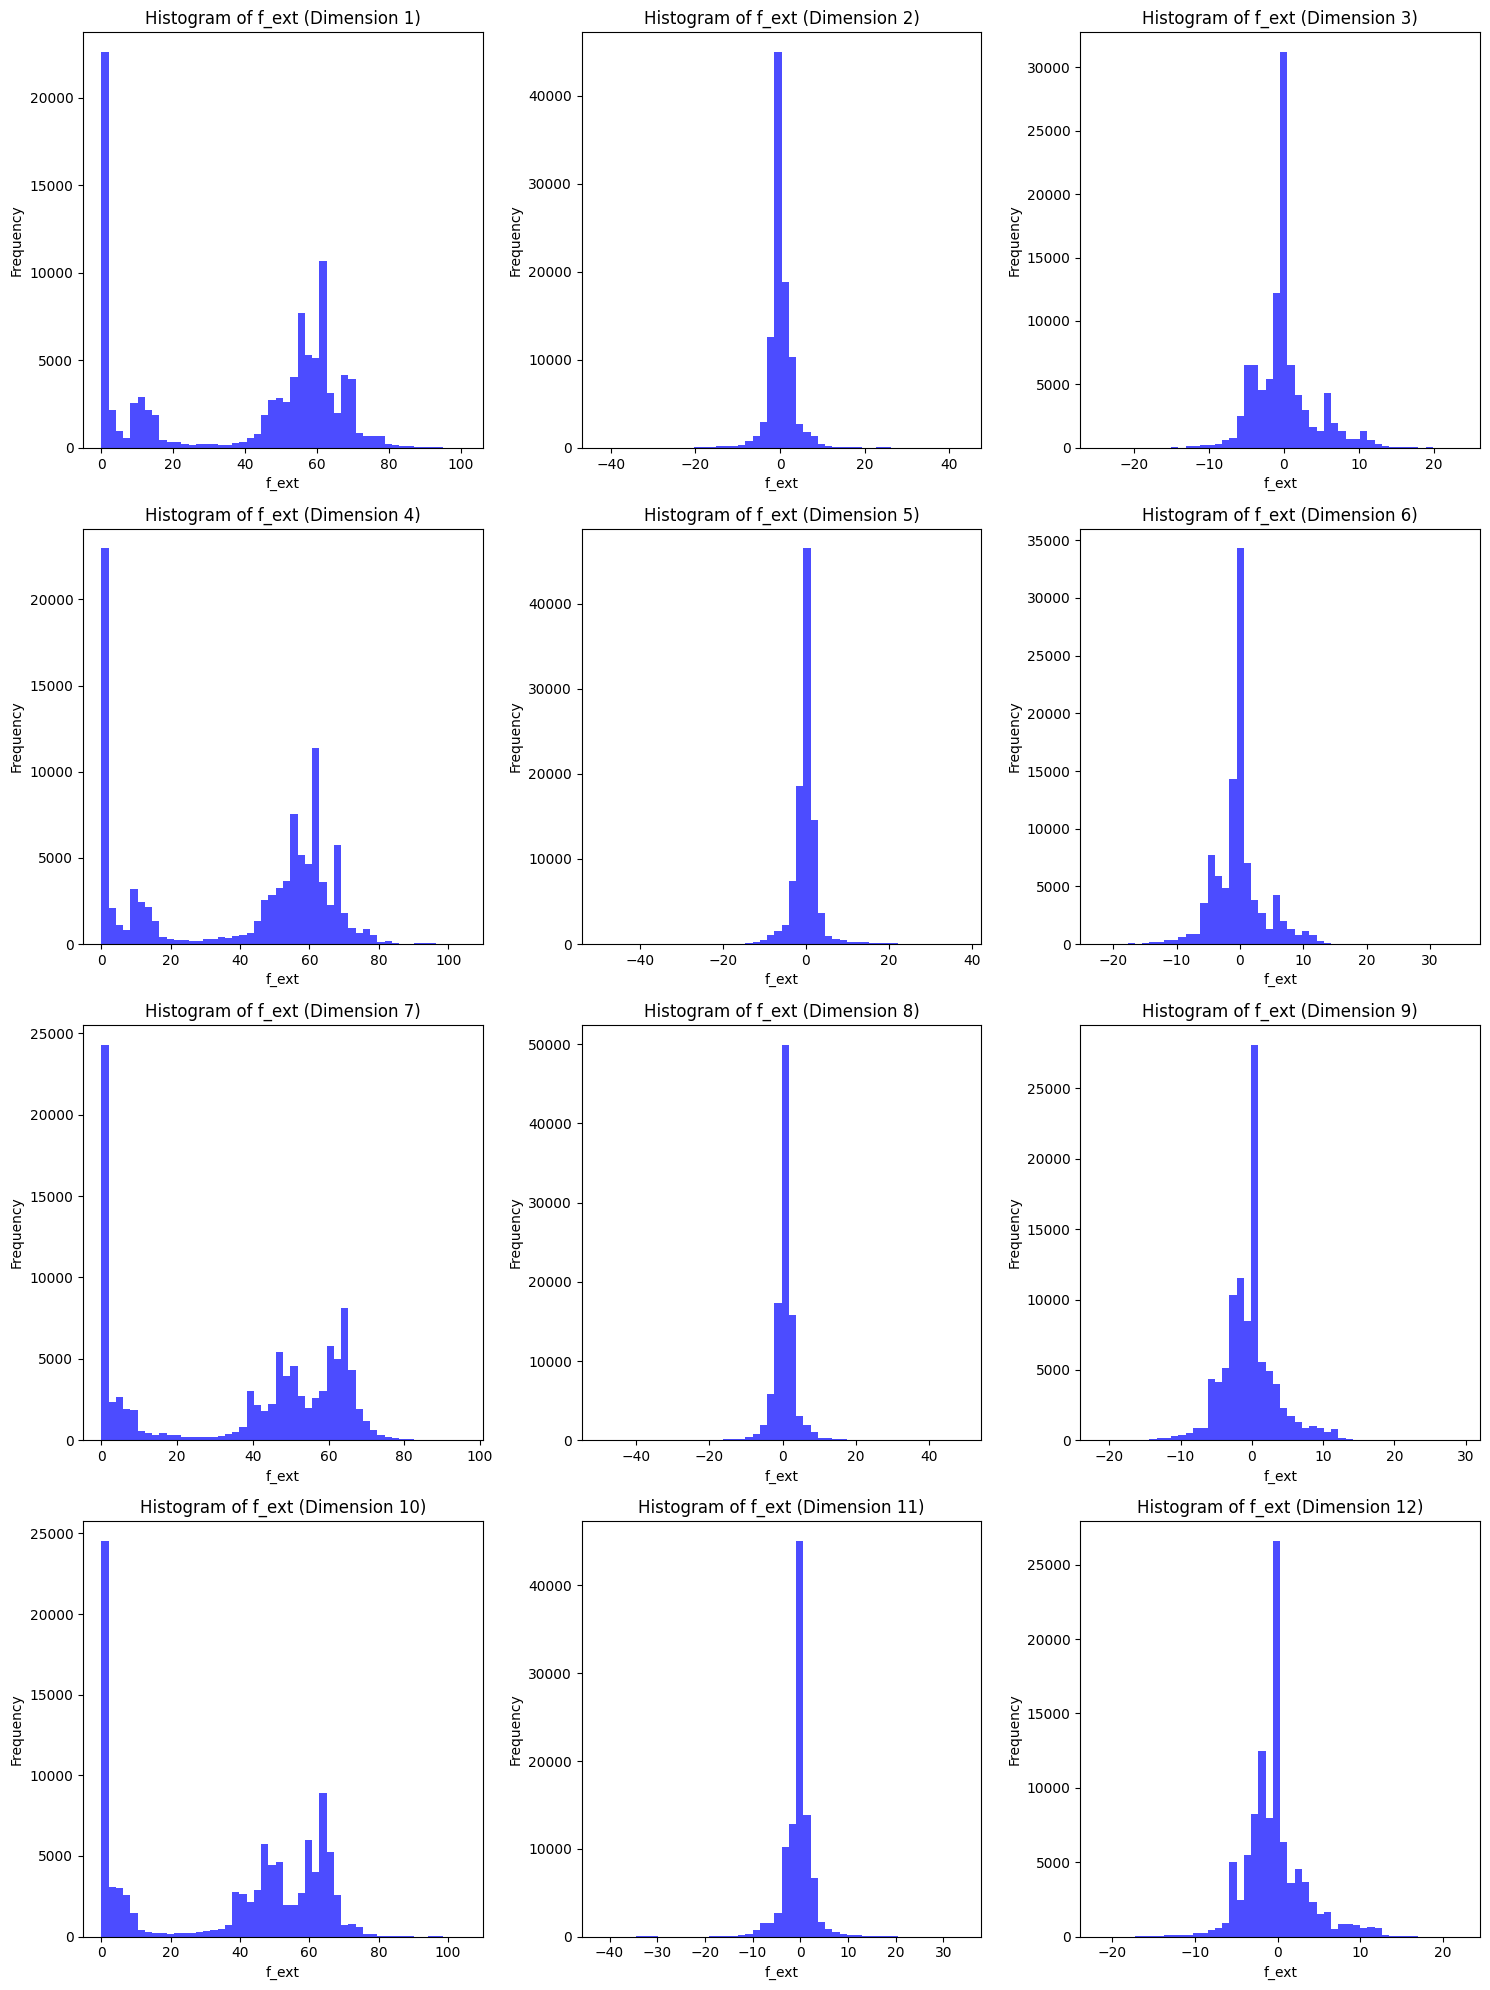

In [2]:
dataset.plot_histogram("f_ext")

In [3]:
len(np.where(dataset.tau_set_points.isnan())[0])

0

[ 2.13146718  0.96586157  5.37954619 -2.14770988  0.89271989  5.39460522
  1.98279904  1.16115637  6.09233293 -1.94486285  1.24357046  6.10678451]


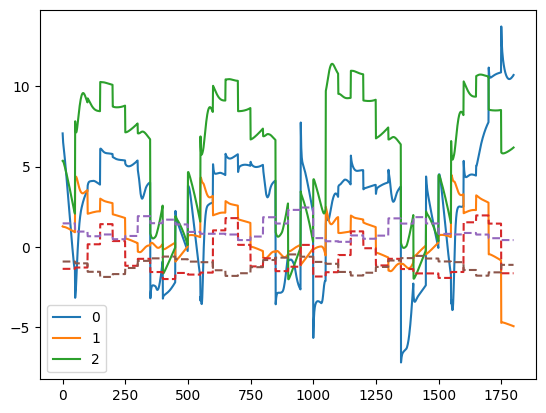

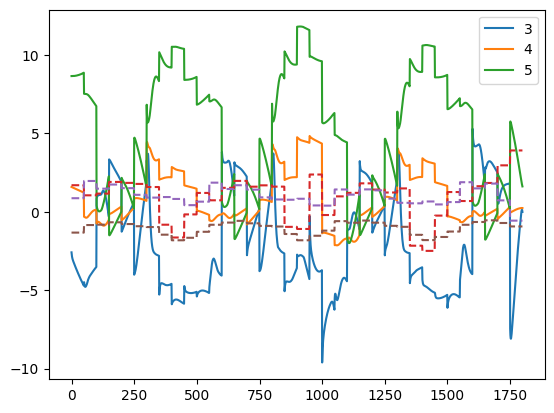

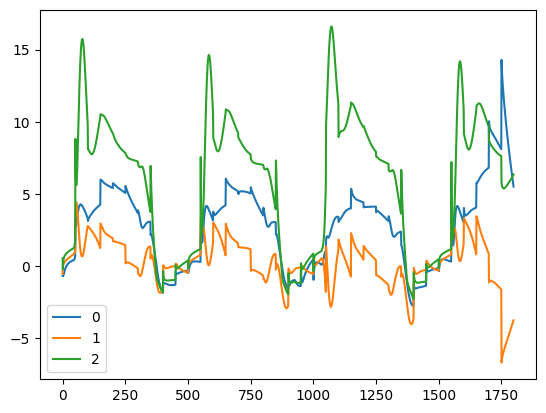

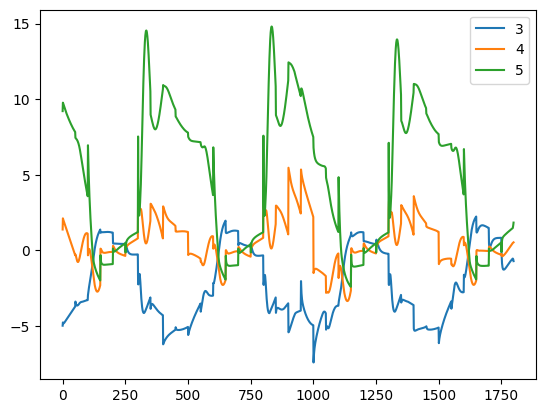

In [4]:
import matplotlib.pyplot as plt
import numpy as np
FILE = "/home/atari_ws/data/trot/data.npz"
data = np.load(FILE)
Kp = np.ones(12) * 3
Kd = np.ones(12) * 0.5

# Scale gains for elbow and shoulder joints
Kd[::3] *= 8.
Kp[2::3] *= 4.

pd_set_points = data["pd_set_points"]
tau_set_points = Kp * (pd_set_points - data["q"][:, -12:]) - Kd * (data["v"][:, -12:])
pin_2_mj = np.array([[3,4,5,0,1,2,9,10,11,6,7,8]], dtype=np.int64)
tau_set_points = np.take_along_axis(tau_set_points, pin_2_mj, axis=-1)
tau = data["tau"]
print(np.mean(tau_set_points, axis=0))
plt.plot(tau_set_points[200:2000, :3], label=[0,1,2])
plt.plot(pd_set_points[200:2000, :3], linestyle="dashed")
plt.legend()
plt.show()
plt.plot(tau_set_points[200:2000, 3:6], label=[3,4,5])
plt.plot(pd_set_points[200:2000, 3:6], linestyle="dashed")
plt.legend()
plt.show()
plt.plot(tau[200:2000, :3], label=[0,1,2])
plt.legend()
plt.show()
plt.plot(tau[200:2000, 3:6], label=[3,4,5])
plt.legend()
plt.show()

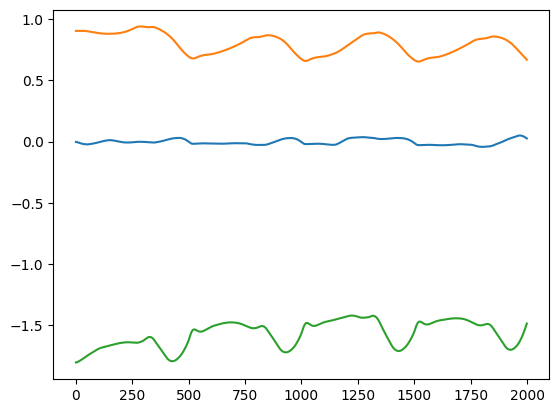

In [5]:
FILE = "/home/atari_ws/data/trot/data.npz"
data = np.load(FILE)
plt.plot(data["q"][:2000, 7:10])
plt.show()

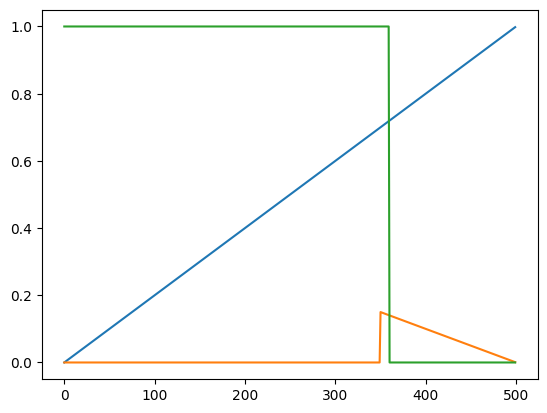

In [6]:
plt.plot(data["gait_phase"][0:500, 0])
plt.plot(data["time_to_cnt"][0:500, 0])
plt.plot(data["foot_cnt"][0:500, 0])
plt.show()

In [7]:
print(len(np.unique(np.round(data["gait_phase"][:, 0], 3), axis=0)))

501
